# 4 Markov Chains

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import networkx as nx

## 4.1
Given a state probability vector $\mu_n$ of a Markov Chain, it satifyes the recurrence relation: 

$$
\mu_n=\mu_{n-1}\mathcal{P} \, 
$$

In order to prove that it is equivalent to:

$$
\mu_n(\,j\,)=\bigg( 1- \sum_{i \in S,\, i \ne j} p_{ji}\bigg) \mu_{n-1}(\,j\,)  + \sum_{i \in S,\, i \ne j} \,p_{ij} \, \mu_{n-1}(\,i\,)\
$$

we can decompose the j-esim element of $\mu_n$ as:

$$
\mu_n(\,j\,)=\sum_{i \in S}p_{ij}\, \mu_{n-1}(\,i\,)\ \, = \sum_{i \in S, \, i = j} p_{ij} \, \mu_{n-1}(\,i\,)  + \sum_{i \in S, \, i \ne j} \,p_{ij} \, \mu_{n-1}(\,i\,)= p_{jj} \, \mu_{n-1}(\,j\,)  + \sum_{i \in S, \, i \ne j} \,p_{ij} \, \mu_{n-1}(\,i\,)\,
$$

Then, since $\mathcal{P}$ is a stochastic matrix, the sum over the rows adds up to $1$:

$$
\sum_{j \in S} p_{ij}=1 \rightarrow p_{jj}= \bigg(1-\sum_{j \in S} p_{ij}\bigg) + p_{jj} = 1-\sum_{j \in S, \, j \ne i} p_{ij} \overset{j 	\longleftrightarrow	 i}{=} 1- \sum_{i \in S,\, i \ne j} p_{ji}
$$

Substituting, the equivalence is proved.

The scomposed equation offers a probabilistic perspective resembling the flow of probabilities. The first term characterizes an outward current from state $j$, signifying the probability leaving that state. Simultaneously, the second term represents the influx from all other states. Consequently, the probability of state $j$ can be intuitively grasped as the net incoming probability from other states, accounting for the probability exiting from state $j$.

## 4.2

In this exercise I will draw the digraphs of the following transition matrices and classify their Markov states:

$$
\mathcal{A} = \begin{pmatrix}
0 & 0.5 & 0.5  \\
0.5 & 0 & 0.5  \\
0.5 & 0.5 & 0 
\end{pmatrix}
$$

$$
\mathcal{B} = \begin{pmatrix}
0 & 0 & 0.5 & 0.5  \\
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$$

$$
\mathcal{C} = \begin{pmatrix}
0.3 & 0.4 & 0 & 0 & 0.3 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.6 & 0.4 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0
\end{pmatrix}
$$

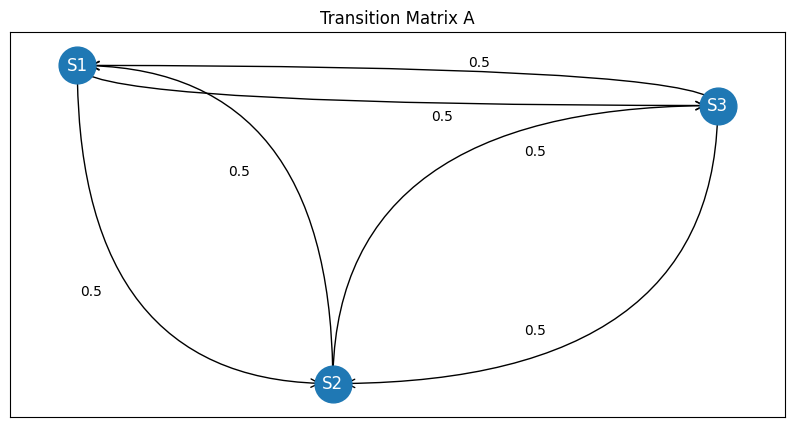


 A^1 is:
 [[0.  0.5 0.5]
 [0.5 0.  0.5]
 [0.5 0.5 0. ]]

 A^2 is:
 [[0.5  0.25 0.25]
 [0.25 0.5  0.25]
 [0.25 0.25 0.5 ]]

 A^3 is:
 [[0.25  0.375 0.375]
 [0.375 0.25  0.375]
 [0.375 0.375 0.25 ]]


In [2]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
fig, ax = plt.subplots(figsize=(10,5))
# Define the edges of the state machine
edges = [(0, 1), (1, 2), (0, 2), (1,0),(2,1),(2,0)]
l = {0:"S1", 1:"S2",2:"S3"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, seed=2503)  

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

# Add labels to the edges
#pos_ = {0: np.array([-1.6,  0.5 ]), 1: np.array([-0.03355414, -1.        ]), 2: np.array([1, 0.5439201])}
labels = {}
for (x,y) in edges:
    labels[(x,y)] = 0.5
ax.text(-0.8, -0.5, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(-0.4, 0.1, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0.4, 0.2, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0.4, -0.7, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0.25, 0.65, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0.15, 0.38, 0.5, color="black", ha="left", va="top", rotation=0)


# Display the graph
plt.title("Transition Matrix A")
plt.show()

A = np.array([[0,0.5,0.5],[0.5,0,0.5],[0.5,0.5,0]])
for n in range(3):
    print("\n A^{} is:\n".format(n+1),np.linalg.matrix_power(A, n+1))

Since $A^2$ has all values greater than 0, and the matricial product is given by the simple multiplication of rows for columns, it's clear that $A^n(i)>0, \quad \forall n>2$ for each i-esim element in the matrix. Therefore, the transition matrix A is regular.

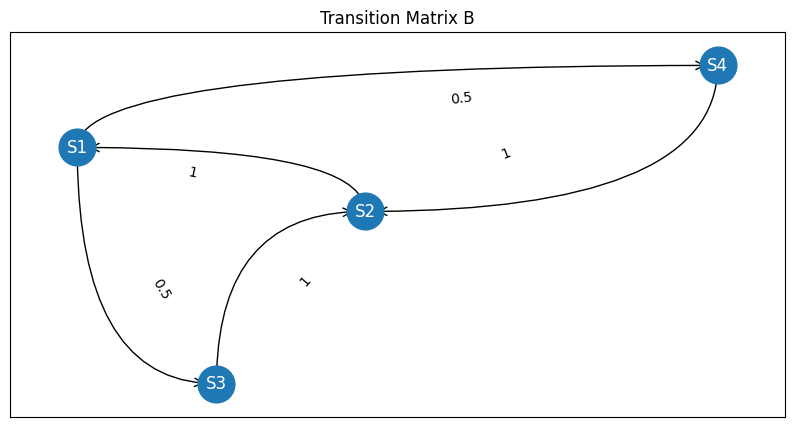


 B^1 is:
 [[0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]]

 B^2 is:
 [[0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]]

 B^3 is:
 [[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]

 B^4 is:
 [[0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]]

 B^5 is:
 [[0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]]

 B^6 is:
 [[1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]

 B^7 is:
 [[0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]]

 B^8 is:
 [[0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]]


In [3]:
fig, ax = plt.subplots(figsize=(10,5))
# Define the edges of the state machine
edges = [(0,2),(0,3),(1,0),(2,1),(3,1)]
l = {0:"S1", 1:"S2",2:"S3",3:"S4"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, seed=2503)  

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

# Add labels to the edges
#pos_ = {0: np.array([-1.6,  0.5 ]), 1: np.array([-0.03355414, -1.        ]), 2: np.array([1, 0.5439201])}
labels = {(0,2):0.5,(0,3):0.5,(1,0):1,(2,1):1,(3,1):1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, rotate=True, label_pos=0.4)


# Display the graph
plt.title("Transition Matrix B")
plt.show()

B = np.array([[0,0,0.5,0.5],[1,0,0,0],[0,1,0,0],[0,1,0,0]])
for n in range(8):
    print("\n B^{} is:\n".format(n+1),np.linalg.matrix_power(B, n+1))

It is possible to observe that $B^n = B^{n+3}$, demonstrating that the matrix is periodic and thus not regular.

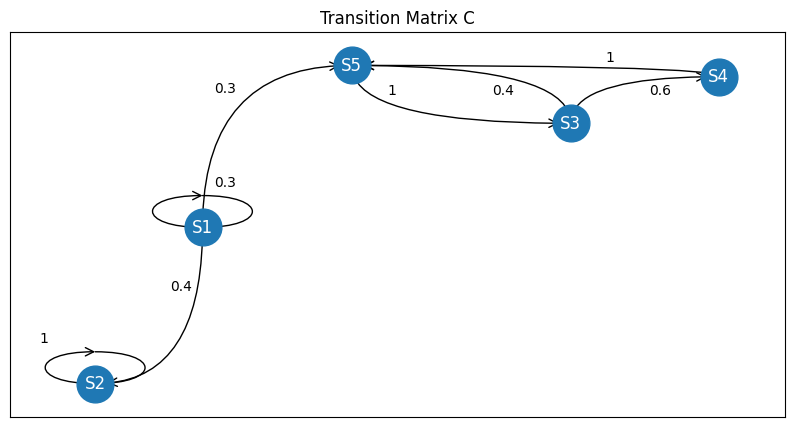


 C^1 is:
 [[0.3 0.4 0.  0.  0.3]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.6 0.4]
 [0.  0.  0.  0.  1. ]
 [0.  0.  1.  0.  0. ]]

 C^2 is:
 [[0.09 0.52 0.3  0.   0.09]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   0.4  0.   0.6 ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.6  0.4 ]]

 C^3 is:
 [[0.027 0.556 0.09  0.18  0.147]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.6   0.24  0.16 ]
 [0.    0.    0.    0.6   0.4  ]
 [0.    0.    0.4   0.    0.6  ]]

 C^4 is:
 [[0.0081 0.5668 0.147  0.054  0.2241]
 [0.     1.     0.     0.     0.    ]
 [0.     0.     0.16   0.36   0.48  ]
 [0.     0.     0.4    0.     0.6   ]
 [0.     0.     0.6    0.24   0.16  ]]

 C^5 is:
 [[0.00243 0.57004 0.2241  0.0882  0.11523]
 [0.      1.      0.      0.      0.     ]
 [0.      0.      0.48    0.096   0.424  ]
 [0.      0.      0.6     0.24    0.16   ]
 [0.      0.      0.16    0.36    0.48   ]]


In [4]:
fig, ax = plt.subplots(figsize=(10,5))
# Define the edges of the state machine
edges = [(0,0),(0,1),(0,4),(1,1),(2,4),(2,3),(3,4),(4,2)]
l = {0:"S1", 1:"S2",2:"S3",3:"S4",4:"S5"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, k=1,seed=2503)  

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

# Add labels to the edges
labels = {(0,0):0.3,(1,1):1,(0,1):0.4,(0,4):0.3,(2,4):0.4,(2,3):0.6,(3,4):1,(4,2):1}

ax.text(-0.2, 0, 0.3, color="black", ha="left", va="top", rotation=0)
ax.text(-0.4, -0.75, 1, color="black", ha="left", va="top", rotation=0)
ax.text(-0.25, -0.5, 0.4, color="black", ha="left", va="top", rotation=0)
ax.text(-0.2, 0.45, 0.3, color="black", ha="left", va="top", rotation=0)
ax.text(0, 0.44, 1, color="black", ha="left", va="top", rotation=0)
ax.text(0.3, 0.44, 0.6, color="black", ha="left", va="top", rotation=0)
ax.text(0.25, 0.6, 1, color="black", ha="left", va="top", rotation=0)
ax.text(0.12, 0.44, 0.4, color="black", ha="left", va="top", rotation=0)


# Display the graph
ax.set_title("Transition Matrix C")
plt.show()

C = np.array([[0.3,0.4,0,0, 0.3],[0,1,0,0,0],[0,0,0,0.6,0.4],[0,0,0,0,1],[0,0,1,0,0]])
for n in range(5):
    print("\n C^{} is:\n".format(n+1),np.linalg.matrix_power(C, n+1))

The directed graph in this scenario illustrates distinct behaviors. State $S_1$ cannot be reached from other states as it lacks incoming arcs, while state $S_2$ is an absorbing state; once reached, the system cannot transition out of it. Consequently, the chain is deemed reducible since not all states are reachable from one another, particularly $S_1$ and $S_2$. However, by restricting our focus to states $S_{3,4,5}$, the resulting chain becomes irreducible.

## 4.3

Given the two Markov chains defined by:
$$
\mathcal{D} = \begin{pmatrix}
0.5 & 0.5  \\
1 & 0 & 
\end{pmatrix}
$$

$$
\mathcal{E} = \begin{pmatrix}
0 & 0 & 1  \\
0 & 1 & 0  \\
0.25 & 0 & 0.75
\end{pmatrix}
$$

we want to check if they are irreducible or not, compute their period, $(P)^n$ and $\lim_{n\rightarrow \infty} (P)^n$.
I start with the analysis of $\mathcal{D}$ and then the analysis of $\mathcal{E} $ will follow.

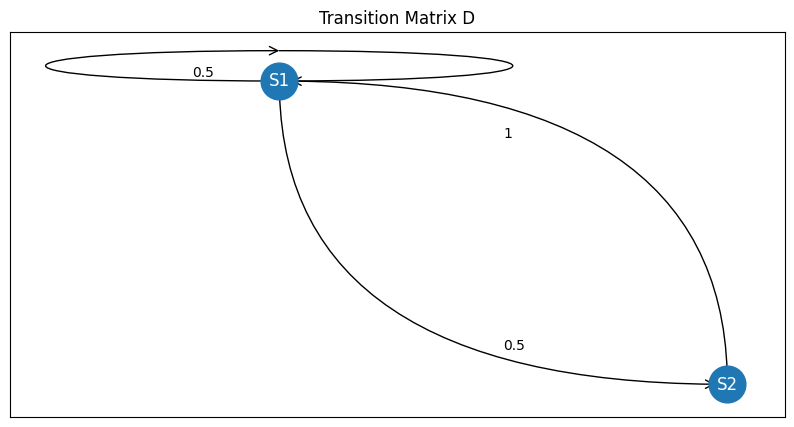


 D^1 is:
 [[0.5 0.5]
 [1.  0. ]]

 D^2 is:
 [[0.75 0.25]
 [0.5  0.5 ]]

 D^3 is:
 [[0.625 0.375]
 [0.75  0.25 ]]

 D^4 is:
 [[0.6875 0.3125]
 [0.625  0.375 ]]

 D^5 is:
 [[0.65625 0.34375]
 [0.6875  0.3125 ]]

 D^6 is:
 [[0.671875 0.328125]
 [0.65625  0.34375 ]]

 D^7 is:
 [[0.6640625 0.3359375]
 [0.671875  0.328125 ]]

 D^8 is:
 [[0.66796875 0.33203125]
 [0.6640625  0.3359375 ]]

 D^9 is:
 [[0.66601562 0.33398438]
 [0.66796875 0.33203125]]


In [5]:
fig, ax = plt.subplots(figsize=(10,5))
# Define the edges of the state machine
edges = [(0,0),(0,1),(1,0)]
l = {0:"S1", 1:"S2"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, k=1,seed=2503)  

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

labels = {(0,0):0.5,(0,1):0.5,(1,0):1}

ax.text(-0.1, 1.1, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0, -0.7, 0.5, color="black", ha="left", va="top", rotation=0)
ax.text(0, 0.7, 1, color="black", ha="left", va="top", rotation=0)


# Display the graph
ax.set_title("Transition Matrix D")
plt.show()

D = np.array([[0.5,0.5],[1,0]])
for n in range(9):
    print("\n D^{} is:\n".format(n+1),np.linalg.matrix_power(D, n+1))

The matrix $ \mathcal{D}^n $ exhibits irreducibility as evidenced by the fact that, commencing from $ n = 2 $, all entries become strictly positive. Consequently, the states are aperiodic, rendering the chain regular.

For a generic $ n $, the matrix can be represented as

$$
 \mathcal{D}^n = \begin{pmatrix} \frac{k_n}{2^n} & \frac{k_{n-1}}{2^n} \\ \frac{k_{n-1}}{2^{n-1}} & \frac{k_{n-2}}{2^{n-1}} \end{pmatrix} 
$$

where $ k_n $ is defined by the recurrence relation

$$
 \begin{cases} k_{-1} = 0 \\ k_0 = k_1 = 1 \\ k_n = k_{n-1} + 2k_{n-2} = 2k_{n-1} + (-1)^n \end{cases} 
$$

Introducing a new sequence $ r_n $ by incorporating the denominator in the matrix, we define

$$
 \begin{cases} r_{-1} = 0 \\ r_0 = r_1 = 1 \\ r_n = \frac{k_n}{2^n} = \frac{2k_{n-1} + (-1)^n}{2^n} = r_{n-1} + \frac{(-1)^n}{2^n} \end{cases} 
$$

The difference between the limit of the sequence $ L = \lim_{n \to \infty} r_n $ and the $ i $-th term $ r_i $ is given by the series

$$
 \sum_{m=i}^{\infty} \frac{(-1)^{m}}{2^m} 
$$

In this context, the Alternating Series Estimation Theorem holds, and thus

$$
 \bigg| \sum_{m=1}^{\infty} \frac{(-1)^{m}}{2^m} - \sum_{m=1}^{M} \frac{(-1)^{m}}{2^m} \bigg| \leq \frac{1}{2^{M+1}} 
$$

This implies that we can estimate $ \lim_{n \to \infty} r_n $ and, consequently, the limit $ \lim_{n \to \infty} \mathcal{D}^n $, by stopping at $ n = M $ with a vanishing error of $ \frac{1}{2^{M+1}} $. Practically, the sequence converges after a few iterations to $ \lim_{n \to \infty} r_n = \frac{2}{3} $, and the limit for the matrix, which is also the invariant distribution $ \pi $, is given by

$$
 \lim_{n \to \infty} \mathcal{D}^n = \begin{pmatrix} \frac{2}{3} & \frac{1}{3} \\ \frac{2}{3} & \frac{1}{3} \end{pmatrix} 
$$

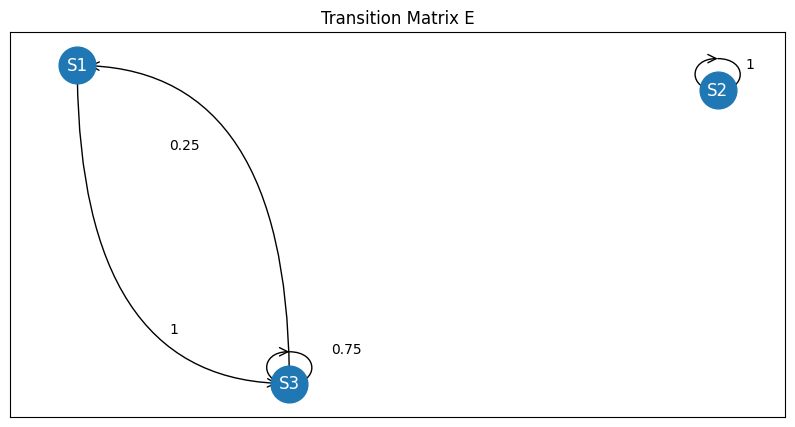


 E^1 is:
 [[0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.25 0.   0.75]]

 E^2 is:
 [[0.25   0.     0.75  ]
 [0.     1.     0.    ]
 [0.1875 0.     0.8125]]

 E^3 is:
 [[0.1875   0.       0.8125  ]
 [0.       1.       0.      ]
 [0.203125 0.       0.796875]]

 E^4 is:
 [[0.203125   0.         0.796875  ]
 [0.         1.         0.        ]
 [0.19921875 0.         0.80078125]]

 E^5 is:
 [[0.19921875 0.         0.80078125]
 [0.         1.         0.        ]
 [0.20019531 0.         0.79980469]]

 E^6 is:
 [[0.20019531 0.         0.79980469]
 [0.         1.         0.        ]
 [0.19995117 0.         0.80004883]]

 E^7 is:
 [[0.19995117 0.         0.80004883]
 [0.         1.         0.        ]
 [0.20001221 0.         0.79998779]]

 E^8 is:
 [[0.20001221 0.         0.79998779]
 [0.         1.         0.        ]
 [0.19999695 0.         0.80000305]]

 E^9 is:
 [[0.19999695 0.         0.80000305]
 [0.         1.         0.        ]
 [0.20000076 0.         0.79999924]]


In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

# Define the edges of the state machine
edges = [(0, 2), (1, 1), (2, 0), (2, 2)]
l = {0: "S1", 1: "S2", 2: "S3"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, k=5, seed=2503)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

# Add labels to the edges
labels = {(0, 2): 1, (1, 1): 1, (2, 0): 0.25, (2, 2): 0.75}

ax.text(-0.5, -0.7, 1, color="black", ha="left", va="top", rotation=0)
ax.text(1, 0.6, 1, color="black", ha="left", va="top", rotation=0)
ax.text(-0.5, 0.2, 0.25, color="black", ha="left", va="top", rotation=0)
ax.text(-0.08, -0.8, 0.75, color="black", ha="left", va="top", rotation=0)

# Display the graph
ax.set_title("Transition Matrix E")
plt.show()

E = np.array([[0, 0, 1], [0, 1, 0], [0.25, 0, 0.75]])

for n in range(9):
    print("\n E^{} is:\n".format(n + 1), np.linalg.matrix_power(E, n + 1))

It is evident that in this case the matrix is reducible since the second state is separated from the other two. 
In general it can be stated that for a generic $ n $, the matrix can be represented as

$$
 \mathcal{E}^n = \begin{pmatrix} \frac{k_{n-2}}{4^{n-1}} & 0 & \frac{k_{n-1}}{4^{n-1}}  \\ 0 & 1 & 0 \\ \frac{k_{n-1}}{4^{n}} & 0 & \frac{k_{n}}{4^{n}} \end{pmatrix} 
$$

where $ k_n $ is defined by the recurrence relation

$$
 \begin{cases} k_{-1} = 0 \\ k_0 = 1 \\ k_1 = 3 \\ k_n = 3k_{n-1} + 4k_{n-2} = 4k_{n-1} + (-1)^n \end{cases} 
$$

In a similar way as before, we can observe that the limit results:

$$
 \lim_{n \to \infty} \mathcal{E}^n = \begin{pmatrix} 0.2 & 0 & 0.8 \\ 0 & 1 & 0 \\ 0.2 & 0 & 0.8 \end{pmatrix} 
$$

## 4.4
Given:

$$
 \mathcal{P} = \begin{pmatrix} 0.5 & 0.25 & 0.25  \\ 0.5 & 0 & 0.5 \\ 0.25 & 0.25 & 0.5 \end{pmatrix} 
$$

it is possible to show that for all $n=2$ we have that all the elements of $ \mathcal{P^2}$ are strictly greater than zero, therefore it can be stated that also for all $n>2$  all elements in $ \mathcal{P^n}$ are non-zeros: since all elements are connected, this guarantee regularity.

In [8]:
P = np.array([[0.5, 0.25, 0.25], [0.5, 0, 0.5], [0.25, 0.25, 0.25]])

for n in range(3):
    print("\n P^{} is:\n".format(n + 1), np.linalg.matrix_power(P, n + 1))


 P^1 is:
 [[0.5  0.25 0.25]
 [0.5  0.   0.5 ]
 [0.25 0.25 0.25]]

 P^2 is:
 [[0.4375 0.1875 0.3125]
 [0.375  0.25   0.25  ]
 [0.3125 0.125  0.25  ]]

 P^3 is:
 [[0.390625 0.1875   0.28125 ]
 [0.375    0.15625  0.28125 ]
 [0.28125  0.140625 0.203125]]


We want to check if: 

$$
 \mathcal{P} = \begin{pmatrix} 1 & 0 \\ 0.5 & 0.5 \end{pmatrix} 
$$

is regular.

In [9]:
P = np.array([[1, 0], [0.5, 0.5]])

for n in range(5):
    print("\n P^{} is:\n".format(n + 1), np.linalg.matrix_power(P, n + 1))


 P^1 is:
 [[1.  0. ]
 [0.5 0.5]]

 P^2 is:
 [[1.   0.  ]
 [0.75 0.25]]

 P^3 is:
 [[1.    0.   ]
 [0.875 0.125]]

 P^4 is:
 [[1.     0.    ]
 [0.9375 0.0625]]

 P^5 is:
 [[1.      0.     ]
 [0.96875 0.03125]]


Since the state 1 is an absorbing state, we can state that we are facing a reducible matrix and therefore the matrix is not regular.

## 4.5

By looking at the plot below is easy to show that the matrix is irreducible, because all states are connected. Now, to show that the states are aperiodic let's consider $\mathcal{P}^2$ and $\mathcal{P}^3$.

$$
\mathcal{P} = \begin{pmatrix}p & 1-p & 0 & 0  \\
0 & 0 & p & 1-p  \\p & 1-p & 0 & 0 \\
0 & 0 & p & 1-p\end{pmatrix}
\qquad\mathcal{P} = \begin{pmatrix}
p^2 & p-p^2 & p-p^2 & 1-2p+p^2  \\p^2 & p-p^2 & p-p^2 & 1-2p+p^2   \\
p^2 & p-p^2 & p-p^2 & 1-2p+p^2  \\p^2 & p-p^2 & p-p^2 & 1-2p+p^2 
\end{pmatrix}\qquad
\mathcal{P} = \begin{pmatrix}p^2 & p-p^2 & p-p^2 & 1-2p+p^2  \\
p^2 & p-p^2 & p-p^2 & 1-2p+p^2   \\p^2 & p-p^2 & p-p^2 & 1-2p+p^2  \\
p^2 & p-p^2 & p-p^2 & 1-2p+p^2 \end{pmatrix} \quad .
$$

Since $\mathcal{P}^2=\mathcal{P}^3$, this continues to hold for any $\mathcal{P}^n$, $n \ge 2$. In particular then looking at $p_{11}^{(n)}=p-p^2 >0$ which holds for $n \ge 2$, the chain is sure to be regular. Above that, since $\mathcal{P}^n$ has already converged, the invariant distribution $\pi=\mu_0 \,\mathcal{P}^2$, with the initial probability which can be any distribition. Therefore

$$\pi = (p^2 , p-p^2 , p-p^2 , 1-2p+p^2 ) .
$$


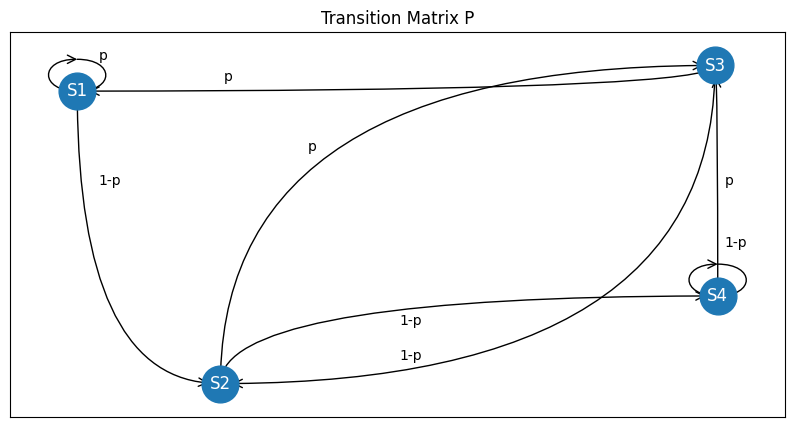

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

# Define the edges of the state machine
edges = [(0, 0), (0, 1), (1, 2), (1, 3),(2,0),(2,1),(3,2),(3,3)]
l = {0: "S1", 1: "S2", 2: "S3", 3: "S4"}

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G, k=5, seed=2503)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, labels=l, font_color="white")

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=15, connectionstyle="angle3", arrows=True)

# Add labels to the edges
ax.text(-0.8, 0.92, "p", color="black", ha="left", va="top", rotation=0)
ax.text(-0.8, 0.2, "1-p", color="black", ha="left", va="top", rotation=0)
ax.text(-0.3, 0.4, "p", color="black", ha="left", va="top", rotation=0)
ax.text(-0.08, -0.6, "1-p", color="black", ha="left", va="top", rotation=0)
ax.text(-0.5, 0.8, "p", color="black", ha="left", va="top", rotation=0)
ax.text(0.7, -0.15, "1-p", color="black", ha="left", va="top", rotation=0)
ax.text(0.7, 0.2, "p", color="black", ha="left", va="top", rotation=0)
ax.text(-0.08, -0.8, "1-p", color="black", ha="left", va="top", rotation=0)

# Display the graph
ax.set_title("Transition Matrix P")
plt.show()